<a href="https://colab.research.google.com/github/ahozdemir/yapaysiniraglari/blob/main/Yapay_sinir_aglar%C4%B1_Odev_Ltest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

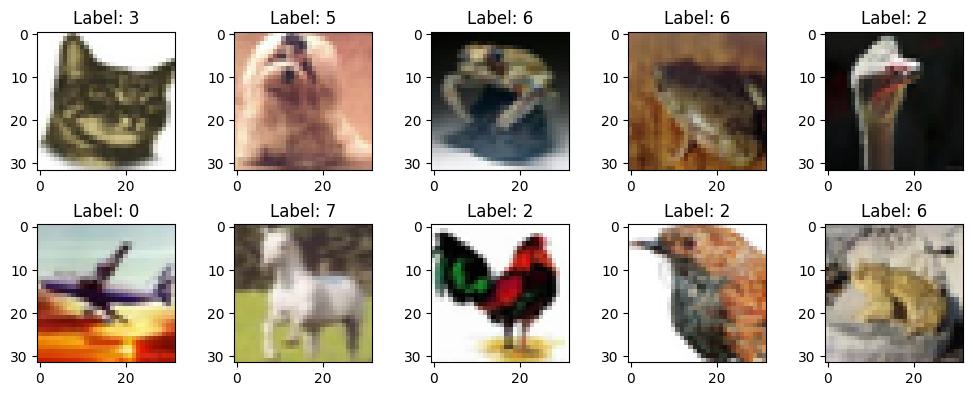

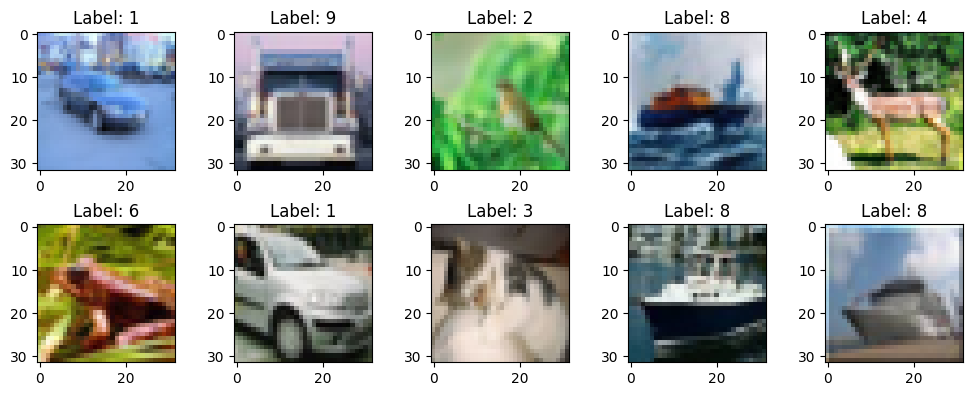

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


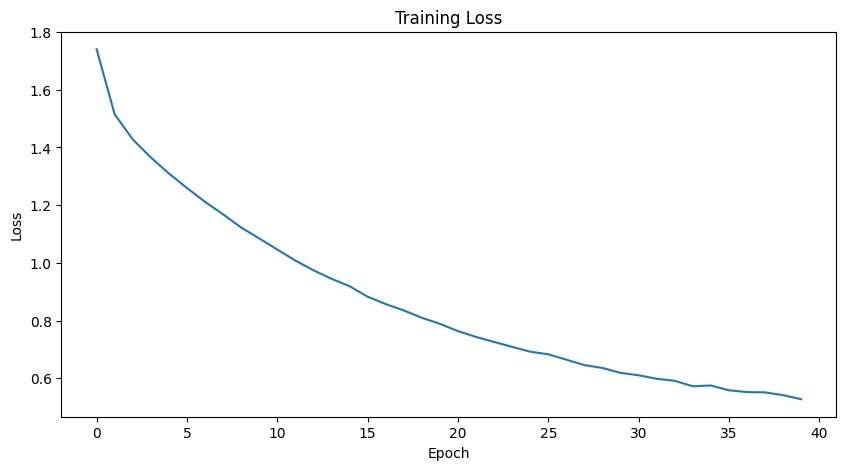

Test accuracy: 0.4985


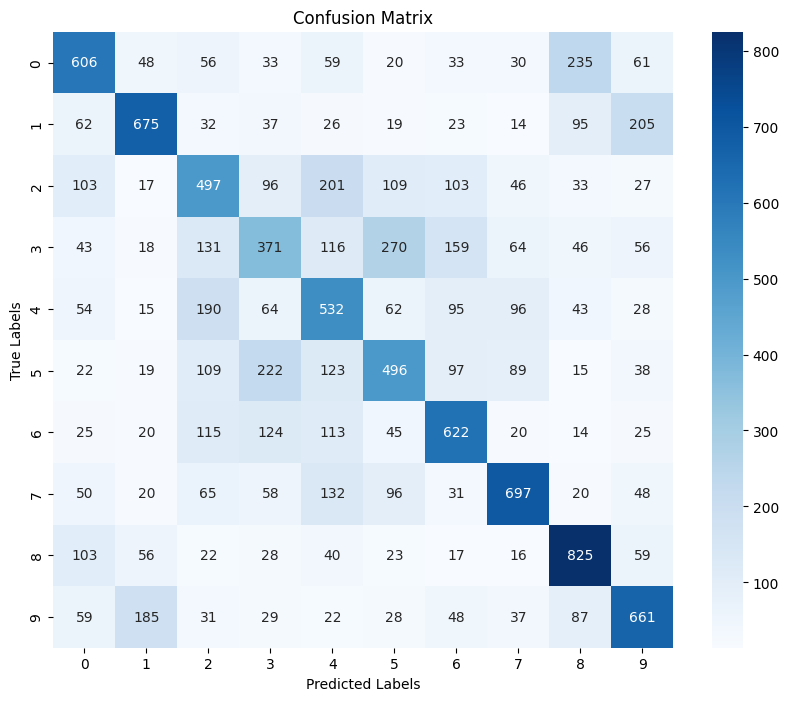

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53      1181
           1       0.63      0.57      0.60      1188
           2       0.40      0.40      0.40      1232
           3       0.35      0.29      0.32      1274
           4       0.39      0.45      0.42      1179
           5       0.42      0.40      0.41      1230
           6       0.51      0.55      0.53      1123
           7       0.63      0.57      0.60      1217
           8       0.58      0.69      0.63      1189
           9       0.55      0.56      0.55      1187

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



In [ ]:
# @title Default title text
# MLP MODEL v1
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Cifar10 Dataset'i Tf' ile birlikte gelen dataset modulü üzerinedn otomatik olarak indirildi
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Sklearn ile yapılabilmesi için tekrardan data setlerini birleştirildi
X = np.concatenate((x_train_full, x_test_full), axis=0)
y = np.concatenate((y_train_full, y_test_full), axis=0)

# Dataset'i eğitim ve test olacak şekilde bölündü ( %80 eğitim, %20 test)
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# eğitim veri setinden 10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range(10):
    axes[i].imshow(X_train[i])  # Resmi göster
    axes[i].set_title(f"Label: {Y_train[i][0]}")

plt.tight_layout()
plt.show()


# test veri setinden  10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range (10):
  axes[i].imshow(x_test[i])  # Resmi göster
  axes[i].set_title(f"Label: {y_test[i][0]}")

plt.tight_layout()
plt.show()


# Data yeniden şekillendirilerek 2 boyutlu bir hale getirildi çünkü MLP Classifiee 2Boyutlu inputa sahip
X_train = X_train.reshape(X_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# StandartScale datalar standart hale yaklaştırılıyor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)



# MLP modelinin oluşturulması
model = MLPClassifier(hidden_layer_sizes=(256, 256),
                    activation='relu',  #aktivasyon fonksiyonu
                    solver='adam',  # ağırlıklar ve bias değerlerinin güncelleştirilmesi için ayarlanan optimizasyon
                    alpha=0.0001,
                    batch_size=32,  # tek seferde ağ'a alınacak veri input sayısı
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=40,  # keras da olan epoch sayısına tekabül etmektedir
                    random_state=42)
model.fit(X_train, Y_train.ravel())

#Kayıp Eğirisi

loss = model.loss_curve_
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# Modelin değerlerndirilerek score'un çıktısının alınması
accuracy = model.score(x_test, y_test.ravel())
print('Test accuracy:', accuracy)

# tahminleme yapılması ve confusion matrix için sonucların çıkartılması
y_pred = model.predict(x_test)



# confusion matrix oluşturulması
cm = confusion_matrix(y_test, y_pred)

# COnfusion matrix'in seaborn ve plot ile yazılması
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Sınıflandırma Raporu
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)






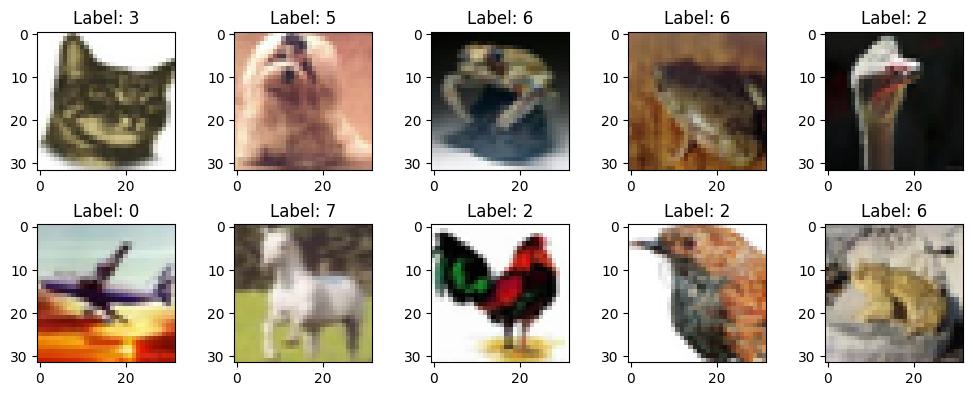

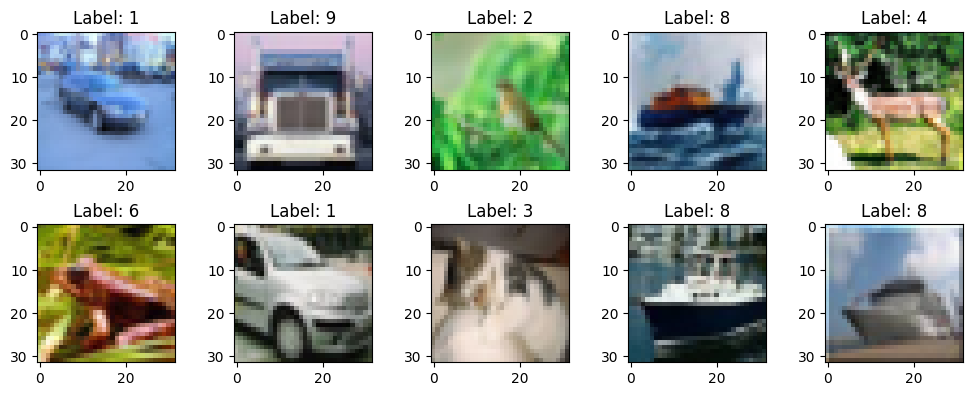

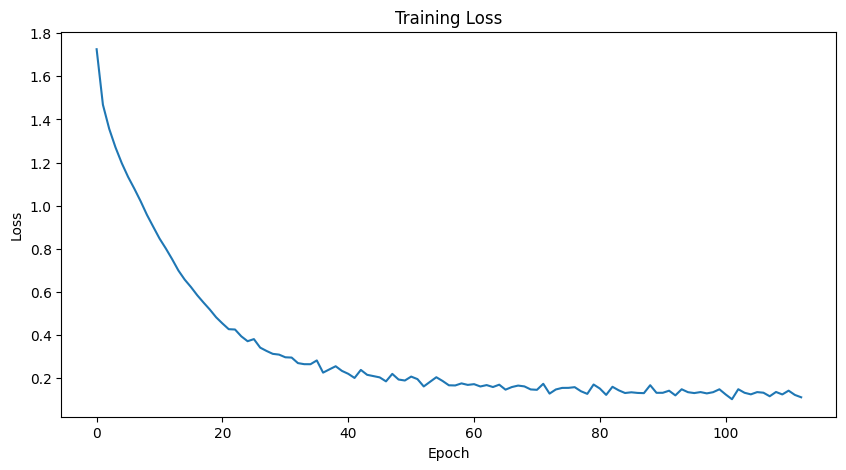

Test accuracy: 0.5178333333333334


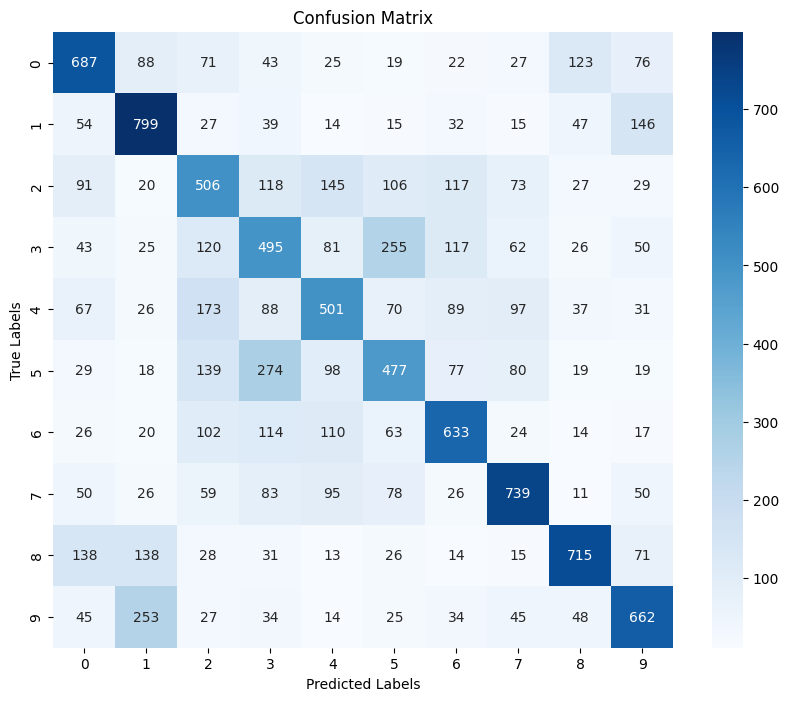

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      1181
           1       0.57      0.67      0.61      1188
           2       0.40      0.41      0.41      1232
           3       0.38      0.39      0.38      1274
           4       0.46      0.42      0.44      1179
           5       0.42      0.39      0.40      1230
           6       0.55      0.56      0.55      1123
           7       0.63      0.61      0.62      1217
           8       0.67      0.60      0.63      1189
           9       0.58      0.56      0.57      1187

    accuracy                           0.52     12000
   macro avg       0.52      0.52      0.52     12000
weighted avg       0.52      0.52      0.52     12000



In [ ]:
# @title Default title text
# MLP MODEL v2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Cifar10 Dataset'i Tf' ile birlikte gelen dataset modulü üzerinedn otomatik olarak indirildi
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Sklearn ile yapılabilmesi için tekrardan data setlerini birleştirildi
X = np.concatenate((x_train_full, x_test_full), axis=0)
y = np.concatenate((y_train_full, y_test_full), axis=0)

# Dataset'i eğitim ve test olacak şekilde bölündü ( %80 eğitim, %20 test)
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# eğitim veri setinden 10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range(10):
    axes[i].imshow(X_train[i])  # Resmi göster
    axes[i].set_title(f"Label: {Y_train[i][0]}")

plt.tight_layout()
plt.show()


# test veri setinden  10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range (10):
  axes[i].imshow(x_test[i])  # Resmi göster
  axes[i].set_title(f"Label: {y_test[i][0]}")

plt.tight_layout()
plt.show()


# Data yeniden şekillendirilerek 2 boyutlu bir hale getirildi çünkü MLP Classifiee 2Boyutlu inputa sahip
X_train = X_train.reshape(X_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# StandartScale datalar standart hale yaklaştırılıyor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)



# MLP modelinin oluşturulması
model = MLPClassifier(hidden_layer_sizes=(512, 256),
                    activation='relu',  #aktivasyon fonksiyonu
                    solver='adam',  # ağırlıklar ve bias değerlerinin güncelleştirilmesi için ayarlanan optimizasyon
                    alpha=0.0001,
                    batch_size=128,  # tek seferde ağ'a alınacak veri input sayısı
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=128,  # keras da olan epoch sayısına tekabül etmektedir
                    random_state=42)
model.fit(X_train, Y_train.ravel())

#Kayıp Eğirisi

loss = model.loss_curve_
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Modelin değerlerndirilerek score'un çıktısının alınması
accuracy = model.score(x_test, y_test.ravel())
print('Test accuracy:', accuracy)

# tahminleme yapılması ve confusion matrix için sonucların çıkartılması
y_pred = model.predict(x_test)

# confusion matrix oluşturulması
cm = confusion_matrix(y_test, y_pred)

# COnfusion matrix'in seaborn ve plot ile yazılması
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Sınıflandırma Raporu
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)






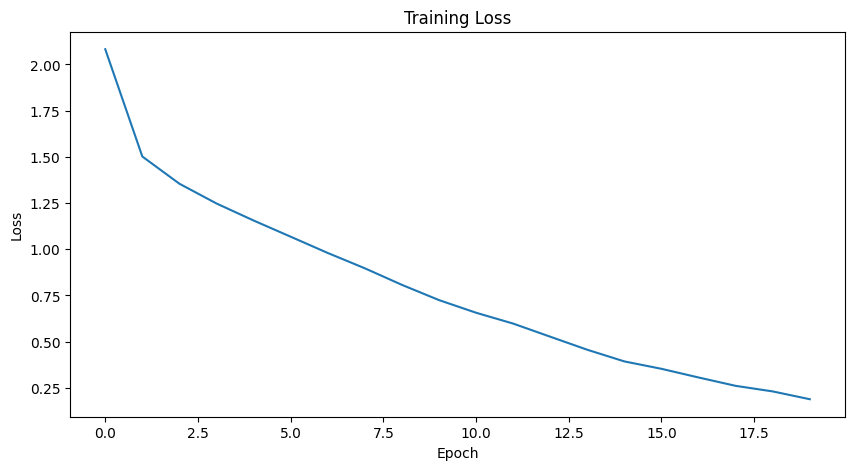

Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 1024, 'hidden_layer_sizes': (1024, 512), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Test accuracy: 0.5309166666666667


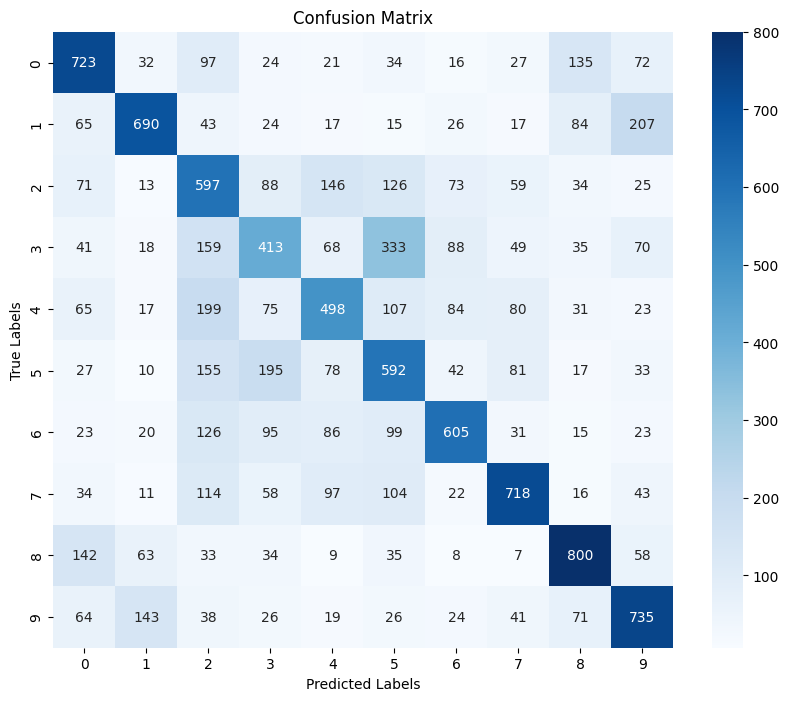

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59      1181
           1       0.68      0.58      0.63      1188
           2       0.38      0.48      0.43      1232
           3       0.40      0.32      0.36      1274
           4       0.48      0.42      0.45      1179
           5       0.40      0.48      0.44      1230
           6       0.61      0.54      0.57      1123
           7       0.65      0.59      0.62      1217
           8       0.65      0.67      0.66      1189
           9       0.57      0.62      0.59      1187

    accuracy                           0.53     12000
   macro avg       0.54      0.53      0.53     12000
weighted avg       0.54      0.53      0.53     12000



In [14]:
# @title Default title text
# MLP MODEL GridSearchCV
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Cifar10 Dataset'i Tf' ile birlikte gelen dataset modulü üzerinedn otomatik olarak indirildi
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Sklearn ile yapılabilmesi için tekrardan data setlerini birleştirildi
X = np.concatenate((x_train_full, x_test_full), axis=0)
y = np.concatenate((y_train_full, y_test_full), axis=0)

# Dataset'i eğitim ve test olacak şekilde bölündü ( %80 eğitim, %20 test)
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# eğitim veri setinden 10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range(10):
    axes[i].imshow(X_train[i])  # Resmi göster
    axes[i].set_title(f"Label: {Y_train[i][0]}")

plt.tight_layout()
plt.show()


# test veri setinden  10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range (10):
  axes[i].imshow(x_test[i])  # Resmi göster
  axes[i].set_title(f"Label: {y_test[i][0]}")

plt.tight_layout()
plt.show()


# Data yeniden şekillendirilerek 2 boyutlu bir hale getirildi çünkü MLP Classifiee 2Boyutlu inputa sahip
X_train = X_train.reshape(X_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# StandartScale datalar standart hale yaklaştırılıyor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)


#  GridSearchCV hiperparametre optimizasyonu için parametreler
param_grid = {
    'hidden_layer_sizes': [(512, 256), (1024, 512)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'batch_size': [1024, 10000],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}
# MLP modelinin oluşturulması
model = MLPClassifier(max_iter=20, random_state=42)

#GridSearchCV nesnesinin oluşturulması
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2, return_train_score=True)

#Datanın verilmesi
grid_search.fit(X_train, Y_train.ravel())

loss = grid_search.best_estimator_.loss_curve_

#Kayıp Eğrisi

plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)


# En iyi model
best_model = grid_search.best_estimator_

# Modelin değerlerndirilerek score'un çıktısının alınması
accuracy = best_model.score(x_test, y_test.ravel())
print('Test accuracy:', accuracy)

# tahminleme yapılması ve confusion matrix için sonucların çıkartılması
y_pred = best_model.predict(x_test)




# confusion matrix oluşturulması
cm = confusion_matrix(y_test, y_pred)

# COnfusion matrix'in seaborn ve plot ile yazılması
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Sınıflandırma Raporu
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)






Train data shape: (50000, 32, 32, 3), Train labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)
0
Eğitim veri şekli: (40000, 32, 32, 3) (40000, 1)
Doğrulama veri şekli: (10000, 32, 32, 3) (10000, 1)


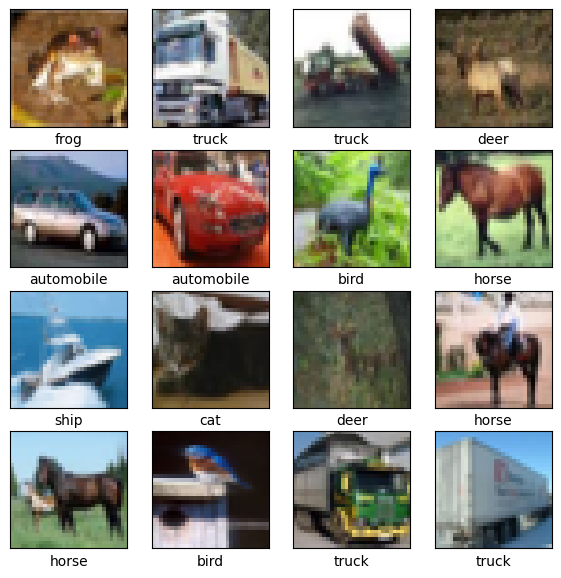

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.1425 - loss: 28.2725 - val_accuracy: 0.1029 - val_loss: 27.1027
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.2316 - loss: 26.2273 - val_accuracy: 0.1169 - val_loss: 25.2692
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.2709 - loss: 24.4156 - val_accuracy: 0.1434 - val_loss: 23.4879
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.2945 - loss: 22.7551 - val_accuracy: 0.2022 - val_loss: 21.6864
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.3188 - loss: 21.1744 - val_accuracy: 0.2662 - val_loss: 20.0894
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.3383 - loss: 19.6791 - val_accuracy: 0.3491 - val_loss: 18.5097
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.3579 - loss: 18.2948 - val_accuracy: 0.3366 - val_loss: 17.2579
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.3636 - loss: 17.0148 - val_accur

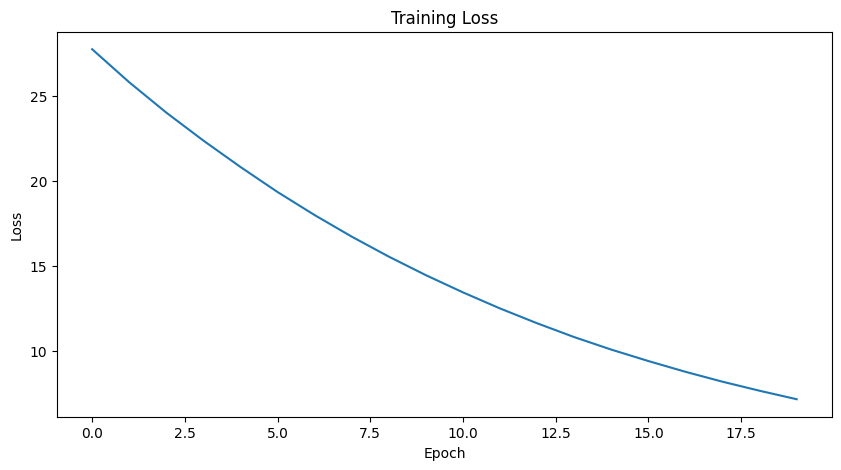

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


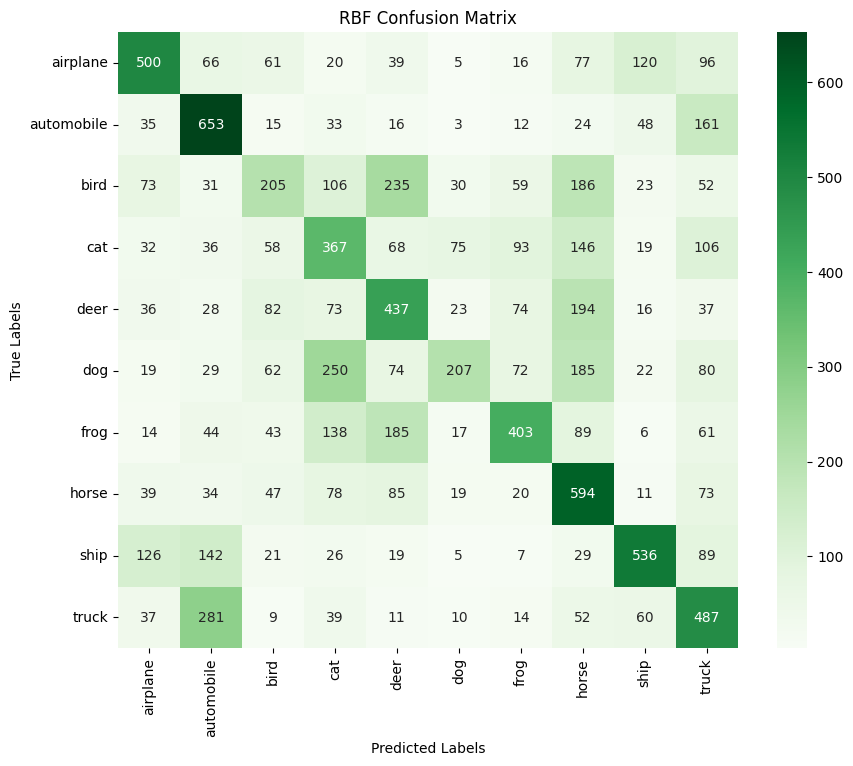

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.52      1000
           1       0.49      0.65      0.56      1000
           2       0.34      0.20      0.26      1000
           3       0.32      0.37      0.34      1000
           4       0.37      0.44      0.40      1000
           5       0.53      0.21      0.30      1000
           6       0.52      0.40      0.46      1000
           7       0.38      0.59      0.46      1000
           8       0.62      0.54      0.58      1000
           9       0.39      0.49      0.43      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Layer, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
import tensorflow.keras.backend as K






# CIFAR-10 veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Sınıf isimlerini set et
class_names = [
    "airplane", "automobile", "bird", "cat",
    "deer", "dog", "frog", "horse", "ship", "truck"
]

print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


#Data frame içerisinde 32 x 32 'lik görüntü için null değeleri toplam değerlere göre temizlendi
print(pd.DataFrame(x_train.reshape(-1, 3072)).isnull().sum().sum())



# Eğitim ve test verilerini %80 - %20 oranında ayırma
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Eğitim veri şekli:", x_train_split.shape, y_train_split.shape)
print("Doğrulama veri şekli:", x_test_split.shape, y_test_split.shape)


# Veri setini gorsellestir.
# Örnek görüntülerin görselleştirilmesi

plt.figure(figsize=(7, 7))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# Görüntüleri 0-1 aralığına ölçeklendirme
x_train = x_train.astype('float32') / 255.0    # Normalize images
x_test = x_test.astype('float32') / 255.0       # Normalize images



# reshape metodu, çok boyutlu veri yapısını düz bir vektör haline getiriyor (flattening).


# Görüntüleri vektör hale getirme (MLP için gerekli)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Etiketleri one-hot encoding yapma (RBF için gerekli)
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)


# Standardize the data
# Bu adımda veriler standardize ediliyor. Yani, her özelliğin (piksel değerlerinin) ortalaması 0, standart sapması ise 1 olacak şekilde ölçekleniyor.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat) # Hem öğrenme (fit), hem dönüştürme (transform) işlemi aynı anda yapılır.
x_test_scaled = scaler.transform(x_test_flat) # Test seti, eğitim setinden hesaplanan ortalama ve standart sapma değerlerini kullanarak standardize edilir.
                                              #Test setinde hiçbir şekilde fit işlemi yapılmaz; yalnızca transform uygulanır.

# Çoğu makine öğrenimi algoritması, veriyi matris yerine düz vektörler halinde bekler.
# Özellikle, lojistik regresyon, SVM, veya basit sinir ağları gibi algoritmalarda bu işlem şarttır.



# Keras, Dense katmanında yerleşik olarak bir "RBF" veya "Gaussian" aktivasyon fonksiyonu sunmaz.
#Bunun yerine, Gaussian tabanlı bir aktivasyon fonksiyonu tanımlamanız gerekiyor.
class RBF(Layer):
    def __init__(self, beta=1.0, **kwargs):
        super(RBF, self).__init__(**kwargs)
        self.beta = beta

    def call(self, inputs):
        return K.exp(-self.beta * K.square(inputs))

# Kayıt işlemi (opsiyonel)
tf.keras.utils.get_custom_objects().update({'rbf': RBF()})




#RBF Modelinin oluşturulması
rbf_model = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),


    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    # RBF tek katmandan oluşmaktadır
    Dense(512, activation=RBF(beta=0.5), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    # Layer 3
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    # Output Layer
    Dense(10, activation='softmax')  # OutPut Nöron 10 Sınıf için
])

rbf_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = rbf_model.fit(x_train, y_train, epochs=20, batch_size=1000,  validation_data=(x_test, y_test))

loss = history.history['loss']

#Kayıp Eğrisi

plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# RBF icin confusion matrix
# Tahminlerde bulun
def rbf_confisuon_matrix_visual():
  y_pred_probs = rbf_model.predict(x_test)  # Tahmin edilen olasılıklar
  y_pred = np.argmax(y_pred_probs, axis=1)  # En yüksek olasılıklı sınıfı seç


def rbf_confisuon_matrix_visual():
  y_pred_probs = rbf_model.predict(x_test)  # Tahmin edilen olasılıklar
  y_pred = np.argmax(y_pred_probs, axis=1)  # En yüksek olasılıklı sınıfı seç

  # Confusion matrix oluştur
  cm = confusion_matrix(y_test, y_pred)

  # Confusion matrix'i görselleştir
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('RBF Confusion Matrix')
  plt.show()

  # Sınıflandırma Raporu
  from sklearn.metrics import classification_report
  report = classification_report(y_test, y_pred)
  print("Classification Report:\n", report)





# Confusion matrix ve f1-sınıflandırma metodu çağrılıyor

rbf_confisuon_matrix_visual()



